# Predicting the solubilities of organic compounds

## 1. Data Preprocessing

In [ ]:
!pip install rdkit
!pip install mordred

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.feature_selection import VarianceThreshold

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

import mordred
from mordred import Calculator, descriptors

In [3]:
raw_df = pd.read_csv("Data/delaney.csv")
raw_df

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [4]:
mol_list = []

for smile in tqdm(raw_df['SMILES']):
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  AllChem.EmbedMolecule(mol)
  mol_list.append(mol)

raw_df = pd.concat([raw_df, pd.DataFrame(mol_list, columns=(['Mol']))], axis=1)

100%|██████████████████████████████████████████████████████████████████████████████| 1144/1144 [00:25<00:00, 44.59it/s]


In [5]:
raw_df.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,Mol
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...


### Descriptor calculator using Mordred library

In [7]:
calc = Calculator(descriptors, ignore_3D=False)

all_desc = calc.pandas(raw_df['Mol'])
all_desc.head()

100%|██████████████████████████████████████████████████████████████████████████████| 1144/1144 [00:37<00:00, 30.83it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,7.989899,31.665095,165.891061,20.736383,28,3,24.0,22.0,4.3125,1.375000
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,131.930033,16.491254,16,0,20.0,16.0,4.0625,1.000000
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,6.000000,2.000000,4.000000,6.000000,1.000000,2.610845,...,7.626083,30.698690,165.891061,20.736383,29,4,22.0,21.0,4.222222,1.444444
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,131.930033,16.491254,18,2,16.0,14.0,3.361111,1.333333
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,7.211103,2.302776,4.605551,7.211103,0.901388,2.947233,...,9.037771,36.999431,185.901768,23.237721,58,9,38.0,40.0,6.125,1.562500


### Cleaning
- Removing missing or non-numerical values (error values from *mordred* lib)
- Removing constant values
- Removing correlated values

In [8]:
all_desc.isnull().sum().sum()

0

In [9]:
# generating column names with numerical and boolean values
numerical_columns = []
boolean_columns = []

for column_name in all_desc.columns:
  column_type = all_desc[column_name].dtype
  if column_type == 'object':
    pass
  elif column_type == 'bool':
    boolean_columns.append(column_name)
  else:
    numerical_columns.append(column_name)

In [10]:
print('Number of numerical columns:', len(numerical_columns))
print('Number of boolean columns:', len(boolean_columns))

Number of numerical columns: 1109
Number of boolean columns: 2


In [11]:
boolean_columns

['Lipinski', 'GhoseFilter']

In [12]:
all_desc[['Lipinski', 'GhoseFilter']]

,Lipinski,GhoseFilter
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
1139,True,True
1140,True,True
1141,True,True
1142,True,True


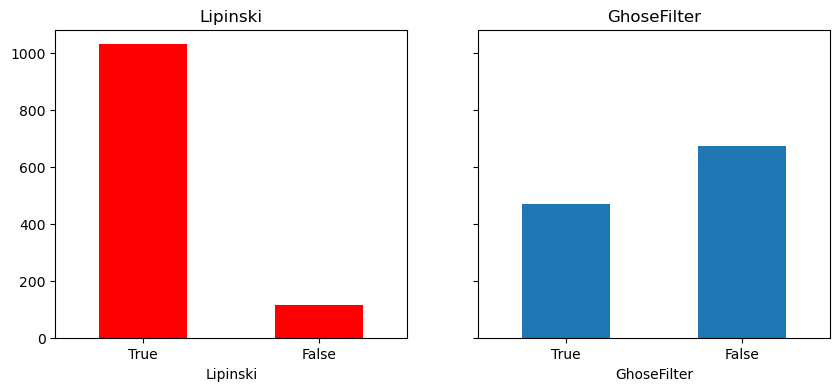

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

all_desc['Lipinski'].value_counts().plot(kind='bar', ax=ax1, title='Lipinski', color='red')
all_desc['GhoseFilter'].value_counts(ascending=True).plot(kind='bar', ax=ax2, title='GhoseFilter')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
plt.show()

In [14]:
data = all_desc[numerical_columns + boolean_columns]
data.shape

(1144, 1111)

In [15]:
data.to_csv('Data/descriptors.csv', index=False)

In [17]:
df = pd.read_csv('Data/descriptors.csv')

In [20]:
def molecules_descriptors_ratio(dataframe):
    print("Molecules: ", dataframe.shape[0])
    print("Descriptors: ", dataframe.shape[1])

In [21]:
molecules_descriptors_ratio(df)

Molecules:  1144
Descriptors:  1111


#### Removing descriptors with low variance

In [40]:
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

In [41]:
high_variance_df = remove_low_variance(df)
molecules_descriptors_ratio(high_variance_df)

Molecules:  1144
Descriptors:  699


#### Removing highly correlated descriptors(80%)

In [42]:
high_variance_df.corr()

,SpAbs_A,SpDiam_A,SpAD_A,LogEE_A,VE1_A,VE3_A,VR1_A,VR2_A,nAromAtom,nAromBond,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,GhoseFilter
SpAbs_A,1.000000,0.768101,1.000000,0.935210,0.932400,0.930201,0.263960,0.279923,0.508883,0.499575,...,0.795369,0.920972,0.904073,-0.053382,0.772792,0.955619,0.985778,0.969919,0.981312,0.579323
SpDiam_A,0.768101,1.000000,0.768101,0.910132,0.857698,0.894233,0.073585,0.083366,0.501674,0.496992,...,0.987882,0.828097,0.707615,0.037342,0.397466,0.781451,0.799374,0.800719,0.707310,0.506835
SpAD_A,1.000000,0.768101,1.000000,0.935210,0.932400,0.930201,0.263960,0.279923,0.508883,0.499575,...,0.795369,0.920972,0.904073,-0.053382,0.772792,0.955619,0.985778,0.969919,0.981312,0.579323
LogEE_A,0.935210,0.910132,0.935210,1.000000,0.973041,0.997231,0.128076,0.142090,0.535353,0.524461,...,0.936372,0.913732,0.855363,-0.048916,0.583775,0.884272,0.924839,0.905504,0.914892,0.629054
VE1_A,0.932400,0.857698,0.932400,0.973041,1.000000,0.980709,0.088678,0.096314,0.544034,0.534813,...,0.884437,0.876780,0.850240,-0.038895,0.562989,0.895903,0.922885,0.906323,0.907779,0.642323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPol,0.955619,0.781451,0.955619,0.884272,0.895903,0.874969,0.258546,0.270345,0.399850,0.395098,...,0.781579,0.910713,0.892419,0.009681,0.728910,1.000000,0.983608,0.991131,0.917257,0.547648
Zagreb1,0.985778,0.799374,0.985778,0.924839,0.922885,0.914314,0.269267,0.283990,0.472104,0.464685,...,0.813967,0.940042,0.909669,-0.007792,0.758857,0.983608,1.000000,0.995565,0.950081,0.566578
Zagreb2,0.969919,0.800719,0.969919,0.905504,0.906323,0.892026,0.265112,0.278959,0.454565,0.449619,...,0.806895,0.939774,0.895270,0.006145,0.739643,0.991131,0.995565,1.000000,0.923162,0.547920
mZagreb2,0.981312,0.707310,0.981312,0.914892,0.907779,0.917978,0.258531,0.275288,0.429401,0.415738,...,0.743854,0.874983,0.908774,-0.077645,0.781456,0.917257,0.950081,0.923162,1.000000,0.593609


In [43]:
def correlation(dataset, threshold=0.8):
    descr_corr = set() # set containing names of correlated descriptors
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # absolute coeff value
                descr_name = corr_matrix.columns[i]
                descr_corr.add(descr_name)
    return descr_corr

In [47]:
correlated_features = correlation(high_variance_df)
new_df = high_variance_df.copy()
new_df.drop(correlated_features, axis=1, inplace=True)

In [48]:
molecules_descriptors_ratio(new_df)

Molecules:  1144
Descriptors:  161


In [49]:
new_df

,SpAbs_A,SpDiam_A,VR1_A,nAromAtom,nBridgehead,nHetero,nN,nO,nS,nF,...,n5Ring,nHRing,n5HRing,nAHRing,n6AHRing,nFRing,nFHRing,nFARing,nRot,GhoseFilter
0,5.818626,4.148627,11.637367,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,4.000000,4.000000,8.000000,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,6.000000,4.000000,11.530010,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,False
3,5.226252,3.695518,8.629874,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,False
4,7.211103,4.605551,17.881697,0,0,6,0,0,0,3,...,0,0,0,0,0,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,19.178732,4.445348,92.824702,0,0,8,1,4,2,0,...,0,0,0,0,0,0,0,0,8,True
1140,21.491177,4.873236,105.790793,6,0,6,1,3,0,0,...,1,1,1,1,0,0,0,0,2,True
1141,29.447228,4.964130,175.486940,16,0,4,0,4,0,0,...,0,1,0,0,0,1,1,0,4,True
1142,27.142711,4.875353,152.094429,12,0,8,2,4,1,0,...,0,0,0,0,0,0,0,0,3,True


#### Converting GhoseFilter descriptors to numerical
*Lipinski descriptors were droped due to low variance

In [51]:
new_df['GhoseFilter'] = new_df['GhoseFilter'].astype(int)

In [56]:
df_final = pd.concat([raw_df, new_df], axis=1)
df_final.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,Mol,SpAbs_A,SpDiam_A,VR1_A,nAromAtom,nBridgehead,...,n5Ring,nHRing,n5HRing,nAHRing,n6AHRing,nFRing,nFHRing,nFARing,nRot,GhoseFilter
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...,5.818626,4.148627,11.637367,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...,4.000000,4.000000,8.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...,6.000000,4.000000,11.530010,0,0,...,0,0,0,0,0,0,0,0,1,0
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...,5.226252,3.695518,8.629874,0,0,...,0,0,0,0,0,0,0,0,1,0
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000011F0D9...,7.211103,4.605551,17.881697,0,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
df_final.to_csv('Data/df_final.csv', index=None)